Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Feature Importance:
             Feature  Importance
3          Loan_Term    0.785708
4     Credit_History    0.698163
6      Self_Employed    0.052408
2         LoanAmount    0.030210
1  CoapplicantIncome   -0.030460
0    ApplicantIncome   -0.135943
5          Education   -0.698163


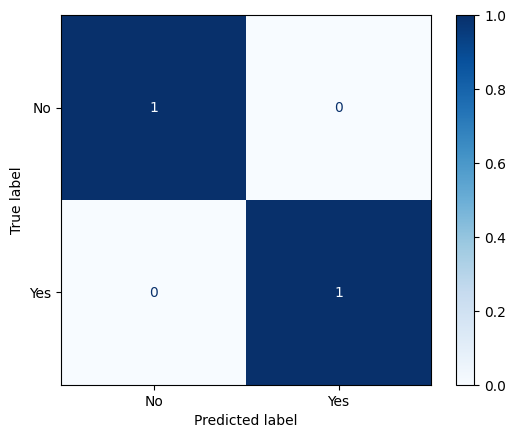

In [1]:
# Import necessary libraries
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For preprocessing
from sklearn.linear_model import LogisticRegression  # For prediction
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)  # For evaluation

# Step 1: Load synthetic loan dataset
data = {
    "ApplicantIncome": [4000, 3000, 6000, 2000, 5000, 8000, 12000, 2500, 4500, 7000],
    "CoapplicantIncome": [2000, 1500, 0, 0, 3000, 0, 1000, 0, 500, 2500],
    "LoanAmount": [150, 100, 200, 80, 180, 250, 300, 90, 120, 220],
    "Loan_Term": [360, 120, 360, 180, 360, 360, 240, 120, 180, 360],
    "Credit_History": [1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
    "Education": ["Graduate", "Not Graduate", "Graduate", "Graduate", "Graduate", "Graduate", "Not Graduate", "Graduate", "Graduate", "Not Graduate"],
    "Self_Employed": ["No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "Loan_Status": ["Y", "N", "Y", "Y", "Y", "Y", "N", "N", "Y", "N"],  # Target variable
}
df = pd.DataFrame(data)

# Step 2: Preprocess the data
# Encode categorical variables
label_encoder = LabelEncoder()
df["Education"] = label_encoder.fit_transform(df["Education"])  # Graduate=1, Not Graduate=0
df["Self_Employed"] = label_encoder.fit_transform(df["Self_Employed"])  # No=0, Yes=1
df["Loan_Status"] = label_encoder.fit_transform(df["Loan_Status"])  # Y=1, N=0

# Features (X) and target (y)
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"]).plot(cmap="Blues")

# Step 7: Analyze the results
# Print feature importance (coefficients)
coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({"Feature": features, "Importance": coefficients}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(feature_importance)
